<a href="https://colab.research.google.com/github/meghaa2003/AirlineSatisfactionPython/blob/main/airlines_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/airline_passenger_satisfaction.csv")
pd.set_option('display.max_columns', None)

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,ease_of_online_booking,check-in_service,online_boarding,gate_location,on-board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
df.drop('id', axis=1, inplace= True)
df.reset_index(inplace= True, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   gender                                  129880 non-null  object 
 1   age                                     129880 non-null  int64  
 2   customer_type                           129880 non-null  object 
 3   type_of_travel                          129880 non-null  object 
 4   class                                   129880 non-null  object 
 5   flight_distance                         129880 non-null  int64  
 6   departure_delay                         129880 non-null  int64  
 7   arrival_delay                           129487 non-null  float64
 8   departure_and_arrival_time_convenience  129880 non-null  int64  
 9   ease_of_online_booking                  129880 non-null  int64  
 10  check-in_service                        1298

In [ ]:
df.isna().sum()

,0
gender,0
age,0
customer_type,0
type_of_travel,0
class,0
flight_distance,0
departure_delay,0
arrival_delay,393
departure_and_arrival_time_convenience,0
ease_of_online_booking,0


In [ ]:
df.dropna(inplace= True)
df.reset_index(inplace= True, drop= True)

In [ ]:
df.duplicated().sum()

0

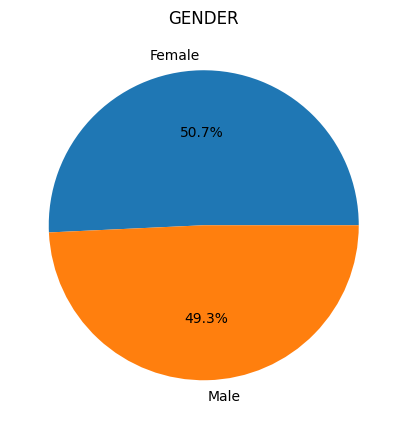

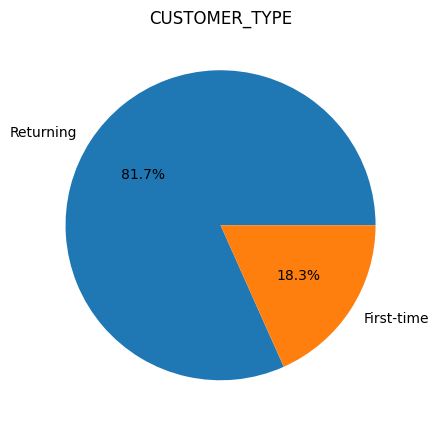

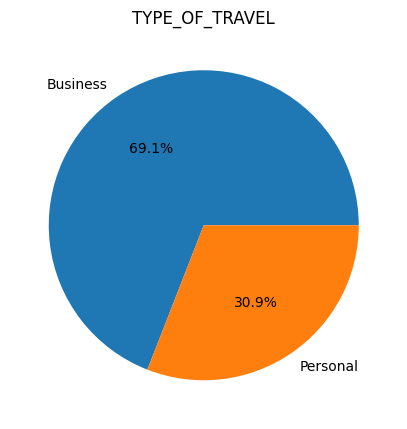

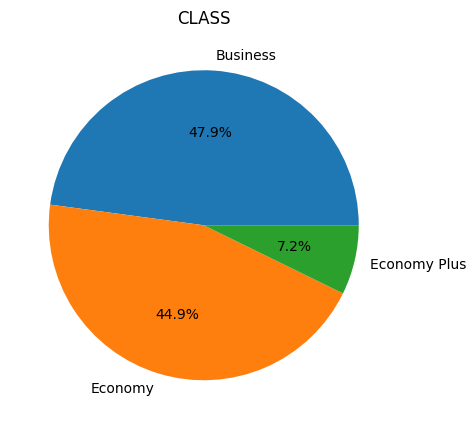

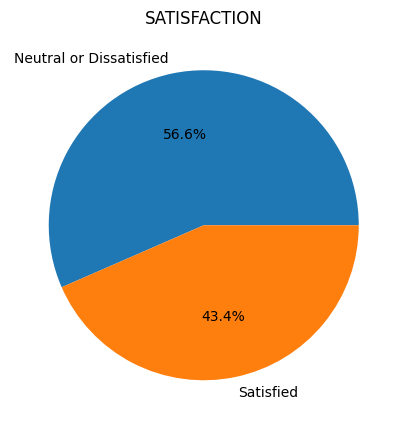

In [ ]:
cat_cols = ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
for i in cat_cols:
  plt.figure(figsize=(5, 6))
  plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%')
  plt.title(i.upper())
  plt.show()

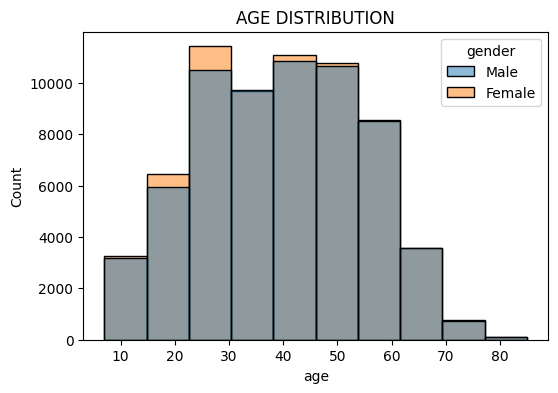

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', hue='gender', bins=10)
plt.title('AGE DISTRIBUTION')
plt.show()


In [ ]:
satis = df[df['satisfaction']=='Satisfied']
dissatis = df[df['satisfaction']!= 'Satisfied']

In [ ]:
from statistics import mean
print('AVERAGE FLIGHT DISTANCE OF SATISFIED PASSENGERS: ', round(mean(satis['flight_distance']), 2))
print('AVERAGE FLIGHT DISTANCE OF DISSATISFIED PASSENGERS: ', round(mean(dissatis['flight_distance']), 2))

AVERAGE FLIGHT DISTANCE OF SATISFIED PASSENGERS:  1529.58
AVERAGE FLIGHT DISTANCE OF DISSATISFIED PASSENGERS:  929.46


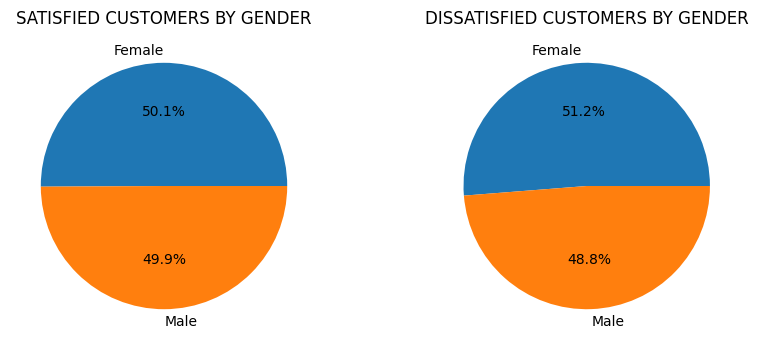

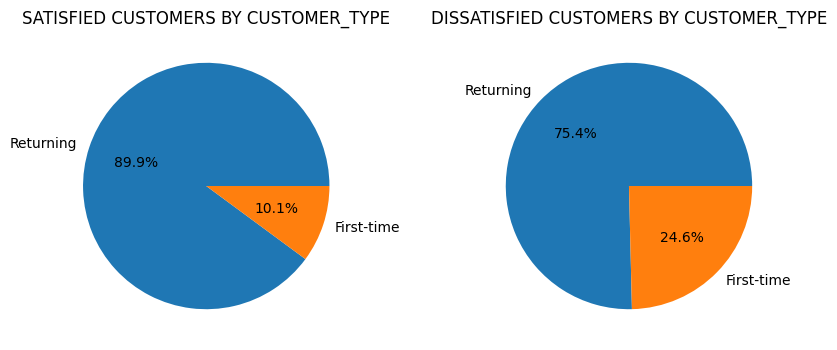

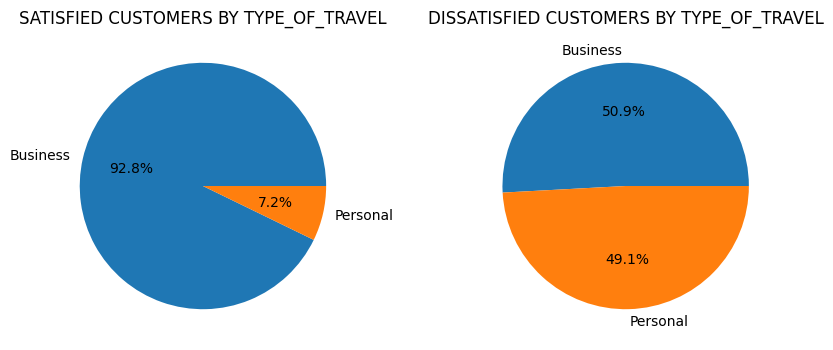

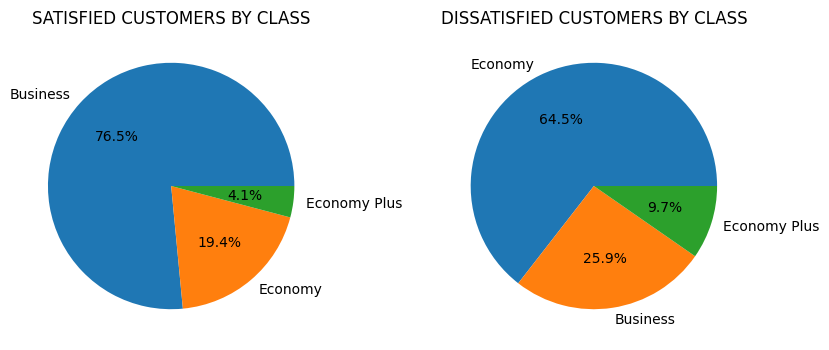

In [ ]:
for i in cat_cols:
    if i != "satisfaction":
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create a grid of 1 row and 2 columns for subplots

        # Plot for satisfied customers
        axes[0].pie(satis[i].value_counts(), labels=satis[i].value_counts().index, autopct='%1.1f%%')
        axes[0].set_title(f"SATISFIED CUSTOMERS BY {i.upper()}")

        # Plot for dissatisfied customers
        axes[1].pie(dissatis[i].value_counts(), labels=dissatis[i].value_counts().index, autopct='%1.1f%%')
        axes[1].set_title(f"DISSATISFIED CUSTOMERS BY {i.upper()}")

        plt.show()



In [ ]:
df

,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,ease_of_online_booking,check-in_service,online_boarding,gate_location,on-board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129483,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129484,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129485,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
criteria_cols = ['departure_delay',	'arrival_delay', 'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check-in_service', 'online_boarding', 'gate_location',
       'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in-flight_service', 'in-flight_wifi_service',
       'in-flight_entertainment', 'baggage_handling']
for i in criteria_cols:
  print(f'SATISFIED CUSTOMERS AVG RATING FOR {i.upper()}: ', round(mean(satis[i]), 2))
  print(f'DISSATISFIED CUSTOMERS AVG RATING FOR {i.upper()}: ', round(mean(dissatis[i]), 2))
  print()
  print()

SATISFIED CUSTOMERS AVG RATING FOR DEPARTURE_DELAY:  12.44
DISSATISFIED CUSTOMERS AVG RATING FOR DEPARTURE_DELAY:  16.34


SATISFIED CUSTOMERS AVG RATING FOR ARRIVAL_DELAY:  12.53
DISSATISFIED CUSTOMERS AVG RATING FOR ARRIVAL_DELAY:  17.06


SATISFIED CUSTOMERS AVG RATING FOR DEPARTURE_AND_ARRIVAL_TIME_CONVENIENCE:  2.96
DISSATISFIED CUSTOMERS AVG RATING FOR DEPARTURE_AND_ARRIVAL_TIME_CONVENIENCE:  3.13


SATISFIED CUSTOMERS AVG RATING FOR EASE_OF_ONLINE_BOOKING:  3.03
DISSATISFIED CUSTOMERS AVG RATING FOR EASE_OF_ONLINE_BOOKING:  2.55


SATISFIED CUSTOMERS AVG RATING FOR CHECK-IN_SERVICE:  3.65
DISSATISFIED CUSTOMERS AVG RATING FOR CHECK-IN_SERVICE:  3.04


SATISFIED CUSTOMERS AVG RATING FOR ONLINE_BOARDING:  4.03
DISSATISFIED CUSTOMERS AVG RATING FOR ONLINE_BOARDING:  2.66


SATISFIED CUSTOMERS AVG RATING FOR GATE_LOCATION:  2.97
DISSATISFIED CUSTOMERS AVG RATING FOR GATE_LOCATION:  2.98


SATISFIED CUSTOMERS AVG RATING FOR ON-BOARD_SERVICE:  3.86
DISSATISFIED CUSTOMERS AVG RATING FO